6
5
256
2


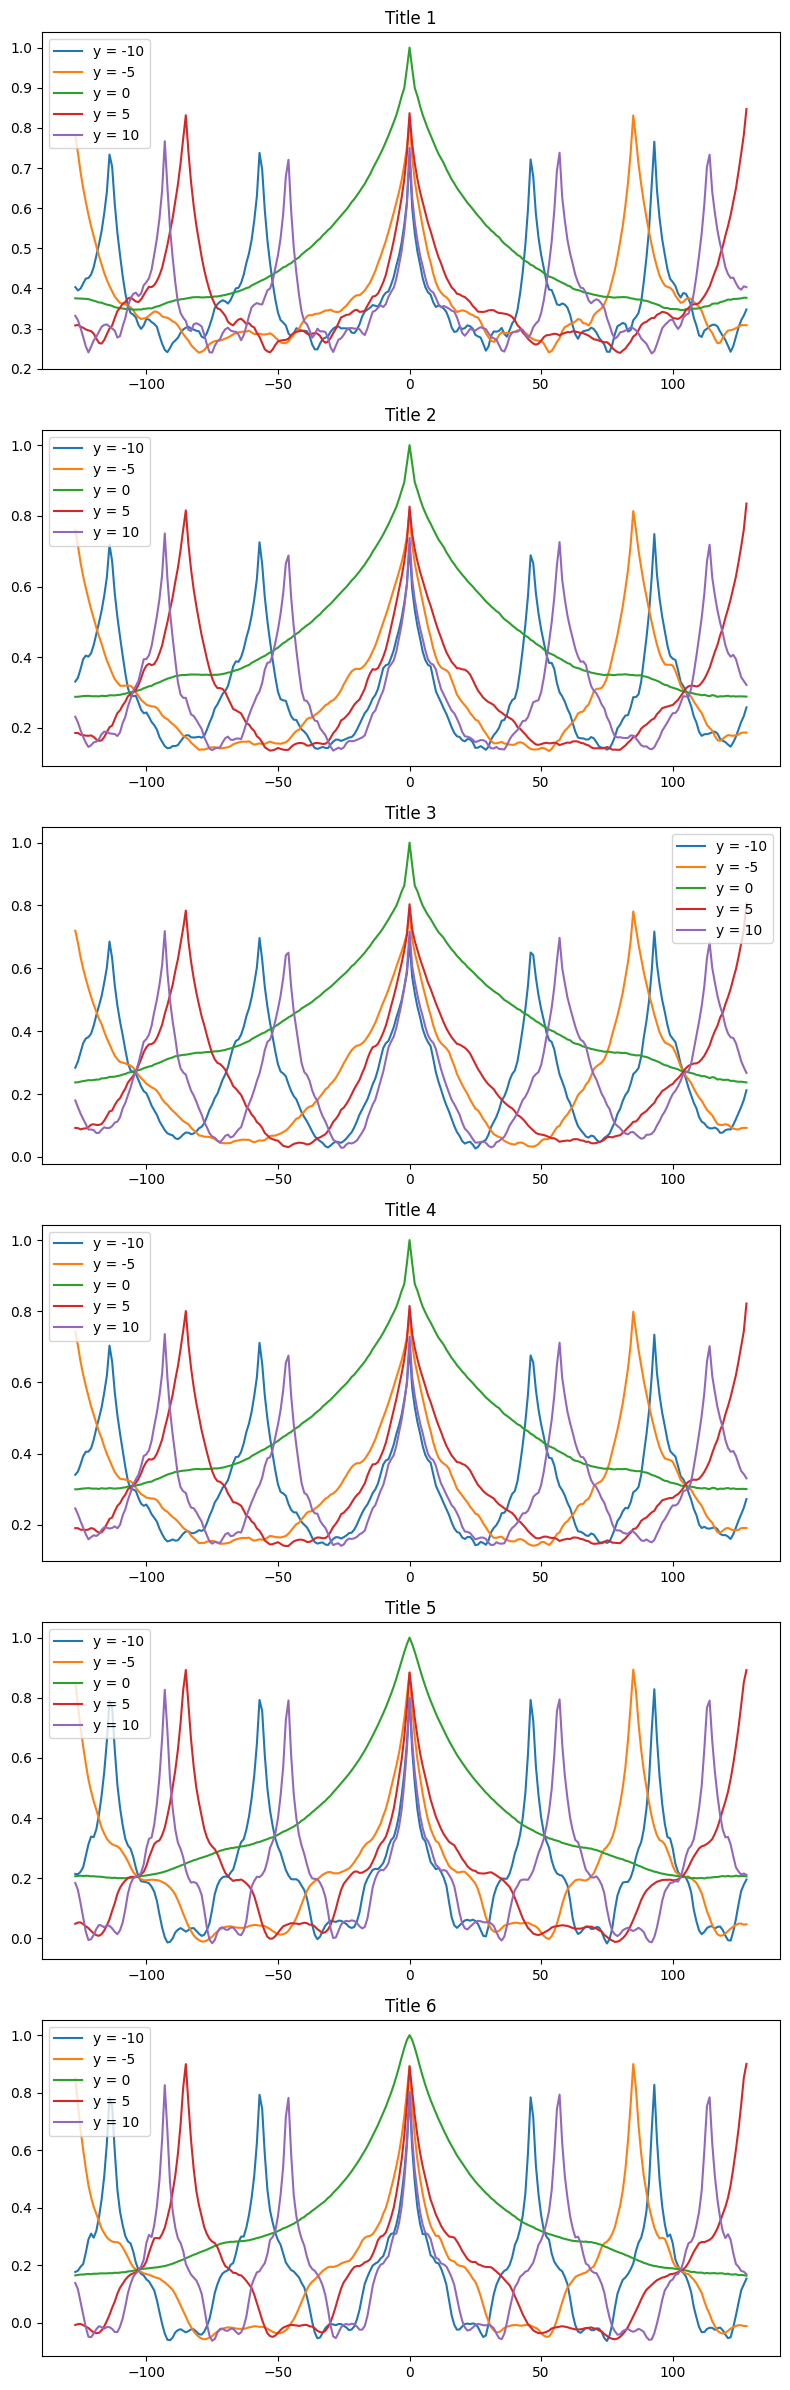

In [32]:
import matplotlib.pyplot as plt
import subprocess

EXE_PATH = './cmake-build-debug/image_edit.exe'
IMG_PATH = './kodim10.bmp'
option = '-task4b'

def plot_graph(x_vals, y_vals):
    plt.plot(x_vals, y_vals)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Graph')
    plt.grid(True)
    plt.show()


def parse_output(output):
    channels = []
    current_channel = []
    curent_y = []
    current_y_value = None
    for line in output:
        if line.strip() == 'NEXT_CHANNEL':
            if current_channel:
                channels.append(current_channel)
                current_channel = []
        elif line.strip() == 'NEXT_Y':
            if curent_y:
                current_channel.append(curent_y)
                curent_y = []
        else:
            values = line.strip().split()
            if (len(values) != 0):
                y_value = int(values[0])
            if (len(values) != 0):
                curent_y.append((int(values[1]), float(values[2])))
    if current_channel:
        channels.append(current_channel)
    return channels


executable_path = f'{EXE_PATH} {option} {IMG_PATH}'
process = subprocess.Popen(executable_path, stdout=subprocess.PIPE)
output = process.communicate()[0].decode('utf-8').split('\r\n')

channels = parse_output(output)

print(len(channels)) # 2
print(len(channels[0])) # 5
print(len(channels[0][0])) # 256
print(len(channels[0][0][0])) # 2

titles = ['Title 1', 'Title 2', 'Title 3', 'Title 4', 'Title 5', 'Title 6']
labels = [-10, -5, 0, 5, 10]


# Создание динамического количества окон графиков
fig, axes = plt.subplots(num_windows, figsize=(8, 4*num_windows))

num_windows = len(channels)
for i in range(num_windows):  # Перебираем количество окон
    axes[i].set_title(titles[i])  # Устанавливаем название графика
    num_plots = len(channels[i])
    for j in range(num_plots):  # В каждом окне динамическое количество графиков
        x_vals = []
        y_vals = []
        for k in range(len(channels[0][0])):
            x_vals.append(channels[i][j][k][0])  # Значения по оси X
            y_vals.append(channels[i][j][k][1])  # Значения по оси Y
        axes[i].plot(x_vals, y_vals, label=f'y = {labels[j]}')  # Строим график на соответствующей оси в окне
    axes[i].legend()  # Добавляем легенду


plt.tight_layout()  # Располагаем графики компактно
plt.show()
    